In [1]:
#!pip install nb_black
%reload_ext nb_black

<IPython.core.display.Javascript object>


    Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

   

In [1]:
def reverse_string(word):
    return word[::-1]


print(reverse_string("forward"))

drawrof


 Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:

def bayes(a, b_given_a, b_given_not_a):

    """
    Calculates P(A | B) using bayes theorem.

    Args:
        a: P(A)
        b_given_a: P(B | A)
        b_given_not_a: P(B | ~A)

    Returns:
        P(A | B)
    """

    # YOUR CODE GOES HERE

   


In [3]:
def bayes(a, b_given_a, b_given_not_a):
    pab = (b_given_a * a) / ((a * b_given_a) + ((1 - a) * b_given_not_a))
    return pab


bayes(0.75, 0.9, 0.2)

0.9310344827586207

<IPython.core.display.Javascript object>

 Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

    a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

     - Stolen bases per game
     - Wins
     - Earned run average

    b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
mlb = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv"
)

In [4]:
over_95_teams = mlb.iloc[(mlb["yearID"] >= 1995).values]

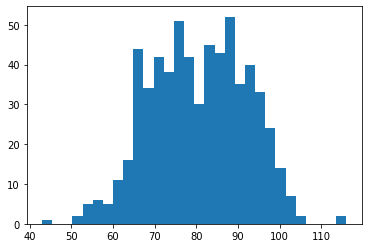

In [5]:
plt.hist(over_95_teams["W"], bins=30)
plt.show()  # bernoulli

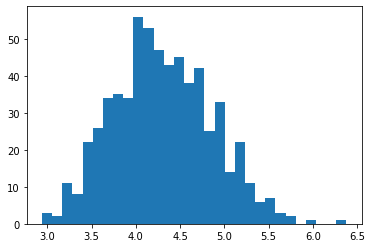

In [6]:
plt.hist(over_95_teams["ERA"], bins=30)
plt.show()  # normal

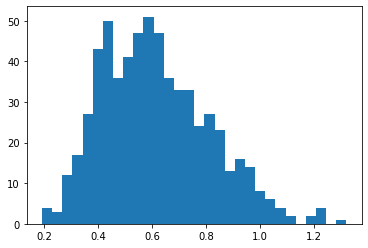

In [7]:
stolen_bases_per_game = over_95_teams["SB"] / over_95_teams["G"]
plt.hist(stolen_bases_per_game, bins=30)
plt.show()  # gamma

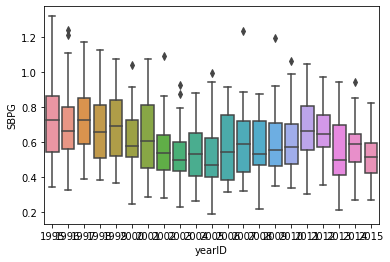

In [15]:
sb_mlb = over_95_teams.assign(SBPG=mlb.SB / mlb.G)
box = sns.boxplot(
    y="SBPG", x="yearID", data=sb_mlb
)  # looks like the range is slowly declining per year.

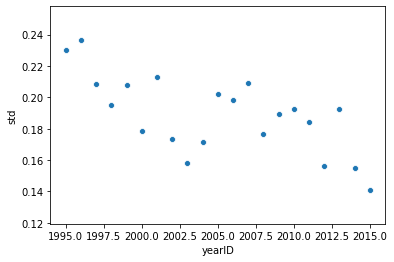

In [16]:
year_group = sb_mlb.groupby(["yearID"])["SBPG"].describe()
scatter = sns.scatterplot(
    x=year_group.index, y=year_group["std"]
)  # This is confirmed by the standard deviation size over time.

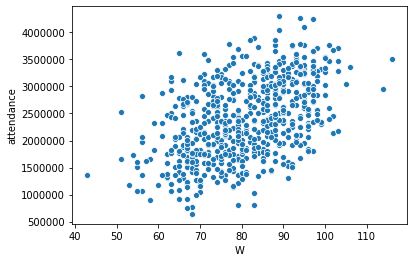

In [17]:
sns.scatterplot(x="W", y="attendance", data=over_95_teams)
stats.pearsonr(
    over_95_teams["W"], over_95_teams["attendance"]
)  # There is a pretty strong correlation between wins and crowd attendance
plt.show()

Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?

    Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].


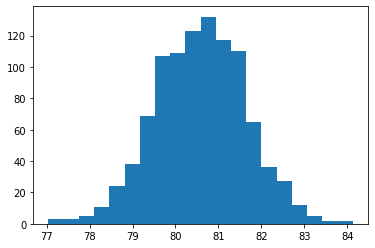

In [11]:
wins_means = []
for i in range(1000):
    wins_sample_mean = over_95_teams["W"].sample(n=100).mean()
    wins_means.append(wins_sample_mean)

plt.hist(wins_means, bins=20)  # normal distribution
plt.show()

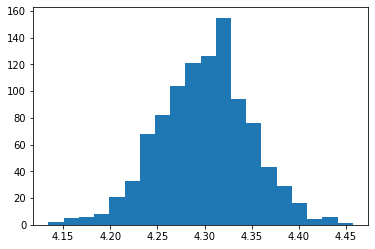

In [12]:
era_means = []
for i in range(1000):
    era_sample_mean = over_95_teams["ERA"].sample(n=100).mean()
    era_means.append(era_sample_mean)

plt.hist(era_means, bins=20)  # normal distribution
plt.show()